In [85]:
import os
import seaborn as sns
import pandas as pd
import numpy as np

os.chdir('../scripts')
import nomad_request

In [86]:
nomad_eda = nomad_request.retrieve_nomad(out_type='pandas')

Xarray's conversion to pandas creates a MultiIndex based on the .25 degree steps - first is all 0-360 by .25 for latitude degree -90, followed by 0-360 by .25 for -89.75, and so on and so forth. In xarray's native format this is a multidimensional data structure - could be more useful down the line to leave it in that form depending on final product. 

In [87]:
nomad_eda.head()

time   step  surface          valid_time  \
latitude longitude                                                           
-90.0    0.00      2022-02-10 18:00:00 0 days        0 2022-02-10 18:00:00   
         0.25      2022-02-10 18:00:00 0 days        0 2022-02-10 18:00:00   
         0.50      2022-02-10 18:00:00 0 days        0 2022-02-10 18:00:00   
         0.75      2022-02-10 18:00:00 0 days        0 2022-02-10 18:00:00   
         1.00      2022-02-10 18:00:00 0 days        0 2022-02-10 18:00:00   

                              sp         orog  prate  veg   slt      lftx  \
latitude longitude                                                          
-90.0    0.00       70351.664062  2775.419434    0.0  0.0  16.0  22.33412   
         0.25       70351.664062  2775.419434    0.0  0.0  16.0  22.33412   
         0.50       70351.664062  2775.419434    0.0  0.0  16.0  22.33412   
         0.75       70351.664062  2775.419434    0.0  0.0  16.0  22.33412   
         1.00       70351.664062  2775.419434    0.0  0.0  16.0  22.33412   

                    cape       cin     4lftx  ist  
latitude longitude                                 
-90.0    0.00        0.0 -0.023535  2.313791  NaN  
         0.25        0.0 -0.023535  2.313791  NaN  
         0.50        0.0 -0.023535  2.313791  NaN  
         0.75        0.0 -0.023535  2.313791  NaN  
         1.00        0.0 -0.023535  2.313791  NaN

In [88]:
# 360 degrees x 4 subdivisions of 0.25 per degree
nomad_eda.iloc[(360 * 4):,].head()

time   step  surface          valid_time  \
latitude longitude                                                           
-89.75   0.00      2022-02-10 18:00:00 0 days        0 2022-02-10 18:00:00   
         0.25      2022-02-10 18:00:00 0 days        0 2022-02-10 18:00:00   
         0.50      2022-02-10 18:00:00 0 days        0 2022-02-10 18:00:00   
         0.75      2022-02-10 18:00:00 0 days        0 2022-02-10 18:00:00   
         1.00      2022-02-10 18:00:00 0 days        0 2022-02-10 18:00:00   

                              sp         orog  prate  veg   slt       lftx  \
latitude longitude                                                           
-89.75   0.00       70364.460938  2773.019287    0.0  0.0  16.0  22.634121   
         0.25       70362.859375  2773.179443    0.0  0.0  16.0  22.634121   
         0.50       70361.265625  2773.499268    0.0  0.0  16.0  22.634121   
         0.75       70359.664062  2773.659424    0.0  0.0  16.0  22.634121   
         1.00       70358.062500  2773.819336    0.0  0.0  16.0  22.634121   

                    cape       cin     4lftx  ist  
latitude longitude                                 
-89.75   0.00        0.0 -0.023535  2.613791  NaN  
         0.25        0.0 -0.023535  2.613791  NaN  
         0.50        0.0 -0.023535  2.613791  NaN  
         0.75        0.0 -0.023535  2.613791  NaN  
         1.00        0.0 -0.023535  2.613791  NaN

Some basic checks first:

In [89]:
nomad_eda.dtypes

time           datetime64[ns]
step          timedelta64[ns]
surface                 int64
valid_time     datetime64[ns]
sp                    float32
orog                  float32
prate                 float32
veg                   float32
slt                   float32
lftx                  float32
cape                  float32
cin                   float32
4lftx                 float32
ist                   float32
dtype: object

Surface looks like some sort of indicator that will not be useful to us, and 'veg' and 'ist' have quite a few NaN's. 

In [90]:
nomad_eda.describe()

,step,surface,sp,orog,prate,veg,slt,lftx,cape,cin,4lftx,ist
count,1038240,1038240.0,1.038240e+06,1.038240e+06,1.038240e+06,350995.000000,1.038240e+06,1.038240e+06,1.038240e+06,1.038240e+06,1.038240e+06,114854.000000
mean,0 days 00:00:00,0.0,9.664942e+04,3.802462e+02,4.757834e-05,12.115235,3.165997e+00,1.143931e+01,1.222200e+02,-8.736746e+00,6.563708e+00,253.115158
std,0 days 00:00:00,0.0,9.306540e+03,8.483869e+02,2.193003e-04,22.868687,5.337358e+00,1.081271e+01,3.239836e+02,3.687622e+01,6.293336e+00,10.268730
min,0 days 00:00:00,0.0,4.815166e+04,-3.551406e+02,0.000000e+00,0.000000,0.000000e+00,-8.065880e+00,0.000000e+00,-8.455236e+02,-2.318621e+01,229.424774
25%,0 days 00:00:00,0.0,9.768766e+04,5.937500e-02,0.000000e+00,0.000000,0.000000e+00,2.534120e+00,0.000000e+00,-1.235352e-01,1.413791e+00,245.095779
50%,0 days 00:00:00,0.0,1.005325e+05,5.937500e-02,8.000000e-07,1.000000,0.000000e+00,1.003412e+01,1.000000e+00,-2.353516e-02,6.313791e+00,250.984787
75%,0 days 00:00:00,0.0,1.013213e+05,2.270994e+02,1.520000e-05,9.900000,6.000000e+00,1.903412e+01,3.600000e+01,-2.353516e-02,1.131379e+01,260.911774
max,0 days 00:00:00,0.0,1.061981e+05,5.917819e+03,2.457040e-02,99.000000,1.600000e+01,4.993412e+01,3.750000e+03,-2.353516e-02,2.801379e+01,273.149780


In [91]:
pd.isna(nomad_eda).sum(axis='rows') / nomad_eda.shape[0]

time          0.000000
step          0.000000
surface       0.000000
valid_time    0.000000
sp            0.000000
orog          0.000000
prate         0.000000
veg           0.661933
slt           0.000000
lftx          0.000000
cape          0.000000
cin           0.000000
4lftx         0.000000
ist           0.889376
dtype: float64

Based on what I can currently glean from the only documentation I can find on these data (https://www.nco.ncep.noaa.gov/pmb/products/gfs/gfs.t00z.pgrb2.0p25.anl.shtml, which was found on the very confusing directory on https://www.nco.ncep.noaa.gov/pmb/products/gfs/), these variables are as follows:

- `sp`
- `orog`
- `prate` - precipitation rate (kg/m^2/s)
- `veg` - vegetation (%). Not sure on methodology but I would guess NVDI. (also explains the NAs)
- `slt`
- `lftx` - surface lifted index (K)
- `cape` - connected available potential energy (J/kg)
- `cin` - convective inhibition (J/kg)
- `4lftx` - 'best' 4-layer lifted index (K)
- `ist` - not found, and especially weird due to NAs


In [92]:
nomad_eda.shape

(1038240, 14)

In [94]:
# to avoid bad math/fence post problem - how many rows should we have?
lats = len(np.arange(-90, 90.25, .25))
lons = len(np.arange(0, 360.25, .25))
lats * lons

1038961

Next steps - establish which of these variables are useful and more generally, determine _where_ the definitive source is for documentation here.

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})

Since wind speed is generally lower on land that over sea, it seems _reasonable_ that `sp` is wind speed - but something this basic should be easy to find docs for, so I must be looking in the wrong place. 

[Text(0.5, 1.0, 'sp')]

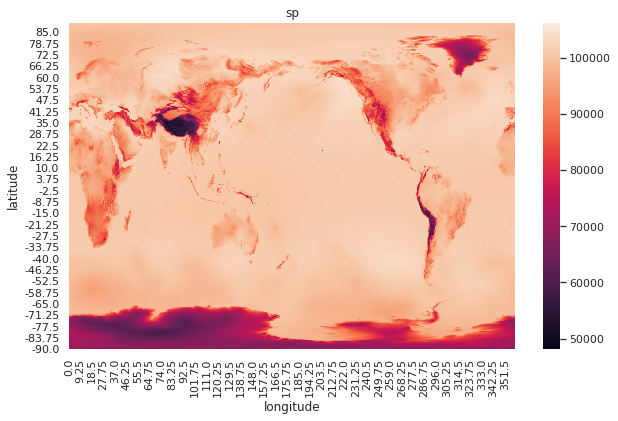

In [ ]:
gfs_plot = sns.heatmap(nomad_eda.sp.unstack('longitude'))
gfs_plot.invert_yaxis()
gfs_plot.set(title='sp')

The other variables just for good measure:

[Text(0.5, 1.0, 'orog')]

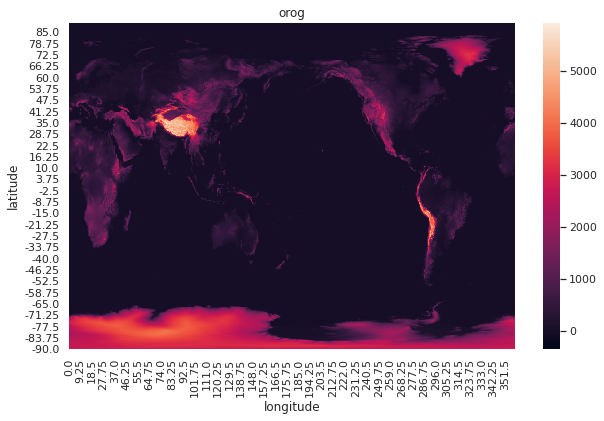

In [ ]:
gfs_plot = sns.heatmap(nomad_eda.orog.unstack('longitude'))
gfs_plot.invert_yaxis()
gfs_plot.set(title='orog')

In [ ]:
gfs_plot = sns.heatmap(nomad_eda.prate.unstack('longitude'))
gfs_plot.invert_yaxis()
gfs_plot.set(title='prate')

In [ ]:
gfs_plot = sns.heatmap(nomad_eda.veg.unstack('longitude'))
gfs_plot.invert_yaxis()
gfs_plot.set(title='veg')

In [ ]:
gfs_plot = sns.heatmap(nomad_eda.slt.unstack('longitude'))
gfs_plot.invert_yaxis()
gfs_plot.set(title='slt')

In [ ]:
gfs_plot = sns.heatmap(nomad_eda.lftx.unstack('longitude'))
gfs_plot.invert_yaxis()
gfs_plot.set(title='lftx')

In [ ]:
gfs_plot = sns.heatmap(nomad_eda.cape.unstack('longitude'))
gfs_plot.invert_yaxis()
gfs_plot.set(title='cape')

In [ ]:
gfs_plot = sns.heatmap(nomad_eda.sin.unstack('longitude'))
gfs_plot.invert_yaxis()
gfs_plot.set(title='sin')

[Text(0.5, 1.0, '4lftx')]

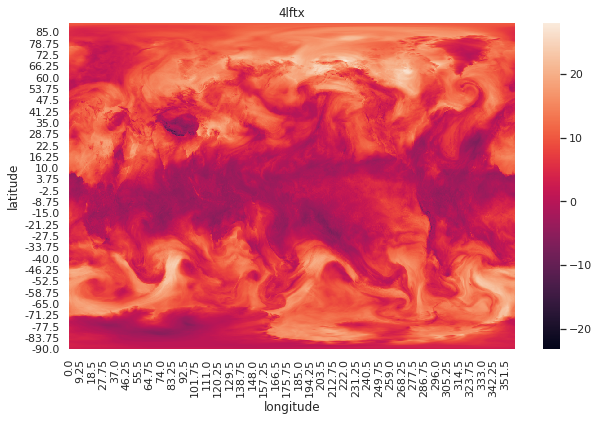

In [ ]:
gfs_plot = sns.heatmap(nomad_eda.loc[:,'4lftx'].unstack('longitude'))
gfs_plot.invert_yaxis()
gfs_plot.set(title='4lftx')

This one is _really_ peculiar - some measure only taken in arctic winds?

[Text(0.5, 1.0, 'ist')]

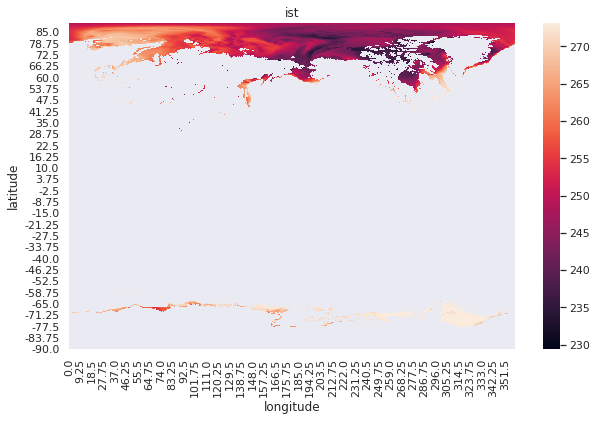

In [ ]:
gfs_plot = sns.heatmap(nomad_eda.ist.unstack('longitude'))
gfs_plot.invert_yaxis()
gfs_plot.set(title='ist')